In [1]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import keras_metrics
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.layers.convolutional import SeparableConv2D
from keras.layers.normalization import BatchNormalization
from math import ceil
import matplotlib.pyplot as plt


from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
PYTHONHASHSEED=0



C:\Users\petra\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('.\HAM10000_metadata.csv')
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [3]:
df.shape

(10015, 7)

In [4]:
df['lesion_id'].is_unique

False

In [5]:
df_new=df.drop_duplicates('lesion_id')

In [6]:
df_new.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back


In [7]:
df_new.shape

(7470, 7)

In [8]:
df_new['lesion_id'].is_unique

True

In [9]:
df_new.groupby('dx').count()

,lesion_id,image_id,dx_type,age,sex,localization
dx,,,,,,
akiec,228,228,228,228,228,228
bcc,327,327,327,327,327,327
bkl,727,727,727,718,727,727
df,73,73,73,73,73,73
mel,614,614,614,613,614,614
nv,5403,5403,5403,5361,5403,5403
vasc,98,98,98,98,98,98


In [10]:
#add .jpg extension to filepaths for every sample in image_id column
df_new['image_id']=df_new['image_id'].apply(lambda x: x+'.jpg' )

C:\Users\petra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df_new.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419.jpg,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769.jpg,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633.jpg,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176.jpg,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837.jpg,bkl,histo,70.0,female,back


In [12]:


#keeping only relevant data, image filepath, and category
df_new=df_new.loc[:,['image_id','dx']]


df_new.head()



,image_id,dx
0,ISIC_0027419.jpg,bkl
2,ISIC_0026769.jpg,bkl
4,ISIC_0031633.jpg,bkl
6,ISIC_0029176.jpg,bkl
8,ISIC_0025837.jpg,bkl


In [13]:
df_new['dx'].groupby(df_new['dx']).count()

dx
akiec     228
bcc       327
bkl       727
df         73
mel       614
nv       5403
vasc       98
Name: dx, dtype: int64

In [14]:
#call bkl, mel and bcc cancer (1) and the rest not cancer (0)


def binary_coder(sample):
    if (sample =='mel') or (sample=='bcc') or (sample=="akiec"):
        sample='1_cancer'
    else:
        sample='0_not_cancer'
        
    return sample
    

# def binary_coder(sample):
#     if (sample =='mel') or (sample=='bcc') or (sample=="akiec"):
#         sample='cancer'
#         return sample

#     else:
#         sample='not cancer'
#         return sample
    
df_new['dx'] = df_new['dx'].apply(binary_coder) 


# df.head()

In [15]:
df_new['dx'].groupby(df_new['dx']).count()

dx
0_not_cancer    6301
1_cancer        1169
Name: dx, dtype: int64

# Undersampling

In [16]:
instances_of_cancer = len(df_new.loc[df_new['dx']=='1_cancer'])
instances_of_not_cancer = len(df_new.loc[df_new['dx']=='0_not_cancer'])

#ratio of cancer to not cancer

# instances_of_not 

In [17]:
df_new['dx'].groupby(df_new['dx']).count()

dx
0_not_cancer    6301
1_cancer        1169
Name: dx, dtype: int64

In [18]:
balanced_df=df_new.drop(df_new[df_new['dx']=='0_not_cancer'].sample(frac=.8145).index)

In [19]:
balanced_df['dx'].groupby(balanced_df['dx']).count()

dx
0_not_cancer    1169
1_cancer        1169
Name: dx, dtype: int64

In [20]:
df_train, df_test =train_test_split(balanced_df, train_size=.8, random_state =2, stratify=balanced_df['dx'])


C:\Users\petra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
print(df_train.shape)
print(df_test.shape)

(1870, 2)
(468, 2)


In [22]:
df_train.head()

,image_id,dx
2904,ISIC_0030094.jpg,1_cancer
2473,ISIC_0026760.jpg,1_cancer
9739,ISIC_0025539.jpg,1_cancer
2120,ISIC_0027071.jpg,1_cancer
3623,ISIC_0027331.jpg,0_not_cancer


In [23]:
batch_size = 15
image_dimensions = (150,150)

train_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45, horizontal_flip = True, vertical_flip = True, width_shift_range=[-20,20], height_shift_range=[-20,20])
test_gen = ImageDataGenerator(rescale = 1./255)

# train_gen = im_gen.flow_from_directory(directory = '..\Images\All_images_in_classes', target_size=(50,50), color_mode='rgb', class_mode = 'categorical', batch_size =100, subset ='training')
# test_gen = im_gen.flow_from_directory(directory = '..\Images\All_images_in_classes', target_size=(50,50), color_mode='rgb', class_mode = 'categorical', batch_size =100, subset = 'validation')

train_gen=train_gen.flow_from_dataframe(dataframe=df_train, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= batch_size)
test_gen = test_gen.flow_from_dataframe(dataframe=df_test, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= batch_size)


Found 1870 images belonging to 2 classes.
Found 468 images belonging to 2 classes.


In [24]:
train_gen.class_indices

{'0_not_cancer': 0, '1_cancer': 1}

In [25]:
df_train.groupby('dx').count()

,image_id
dx,
0_not_cancer,935
1_cancer,935


# Defining Custom Metrics

In [23]:
def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    

def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Iteration 1

In [176]:

input_into_first_layer = (150,150,1)

model = Sequential()

model.add(Conv2D(32, (3, 3),input_shape=input_into_first_layer))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2) ))

model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation ='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation ='sigmoid'))
# model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy',recall, f1])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
activation_12 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 17, 17, 64)        0         
__________

In [177]:
model.fit_generator(
        train_gen,
        steps_per_epoch=ceil(1870/batch_size),
        epochs=30,
        class_weight = {0:1,
                        1:3}
)

Epoch 1/30
125/125 [==============================] - 46s 369ms/step - loss: 1.1257 - binary_accuracy: 0.5000 - recall: 1.0000 - f1: 0.6580
Epoch 2/30
125/125 [==============================] - 36s 291ms/step - loss: 1.1069 - binary_accuracy: 0.4995 - recall: 0.9989 - f1: 0.6542
Epoch 3/30
125/125 [==============================] - 36s 287ms/step - loss: 1.0701 - binary_accuracy: 0.5141 - recall: 0.9716 - f1: 0.6568
Epoch 4/30
125/125 [==============================] - 37s 295ms/step - loss: 1.0542 - binary_accuracy: 0.5027 - recall: 0.9966 - f1: 0.6582
Epoch 5/30
125/125 [==============================] - 37s 293ms/step - loss: 1.0361 - binary_accuracy: 0.5315 - recall: 0.9786 - f1: 0.6666
Epoch 6/30
125/125 [==============================] - 37s 299ms/step - loss: 1.0560 - binary_accuracy: 0.5211 - recall: 0.9846 - f1: 0.6629
Epoch 7/30
125/125 [==============================] - 36s 291ms/step - loss: 0.9961 - binary_accuracy: 0.5512 - recall: 0.9780 - f1: 0.6740
Epoch 8/30
125/125 [

In [288]:
model.evaluate_generator(test_gen, steps = len(test_gen))


[0.5743401226324912,
 0.7371795009344052,
 0.9313949927305564,
 0.7747461306743133]

In [178]:
model.evaluate_generator(test_gen, steps=len(test_gen))

[0.5312961641794596,
 0.7777777910232544,
 0.8931728028334104,
 0.7931332015074216]

In [183]:
model.predict_generator(test_gen, steps=len(test_gen))

array([[0.9561094 ],
       [0.9389213 ],
       [0.9160671 ],
       [0.32291675],
       [0.8411027 ],
       [0.9402746 ],
       [0.91403186],
       [0.55686784],
       [0.6563827 ],
       [0.9299679 ],
       [0.6021623 ],
       [0.8766493 ],
       [0.01542564],
       [0.44289583],
       [0.43057498],
       [0.8293996 ],
       [0.5632729 ],
       [0.95762   ],
       [0.24148282],
       [0.6365726 ],
       [0.76565003],
       [0.8827876 ],
       [0.40634325],
       [0.775023  ],
       [0.91720414],
       [0.8579552 ],
       [0.9893608 ],
       [0.26101786],
       [0.7088862 ],
       [0.11142515],
       [0.038652  ],
       [0.93577975],
       [0.989998  ],
       [0.11615637],
       [0.9477804 ],
       [0.21683529],
       [0.05119297],
       [0.49173635],
       [0.04385802],
       [0.95053375],
       [0.19184756],
       [0.48839357],
       [0.94122285],
       [0.98418206],
       [0.7467841 ],
       [0.9384419 ],
       [0.9844174 ],
       [0.899

In [70]:
len(test_gen)

32

# Predicting on a single image Without ImageDataGenerator class

In [106]:
import cv2 as cv
import matplotlib.pyplot as plt

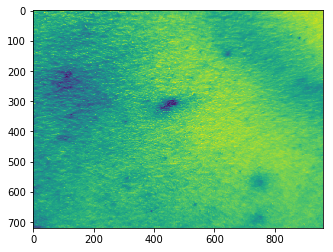

In [107]:
img = cv.imread('mole.jpg',cv.IMREAD_GRAYSCALE)
plt.imshow(img)



In [108]:
img.shape

(720, 960)

In [109]:
def pre_process(img):
    img=cv.resize(img,(150,150))
    img=img/255.0
    img=img.reshape(1,150,150,-1)
#     img=np.array([img])
    return img



In [110]:
image=pre_process(img)

In [111]:
image.shape

(1, 150, 150, 1)

In [112]:
model_2.predict(image)

array([[0.64714396]], dtype=float32)

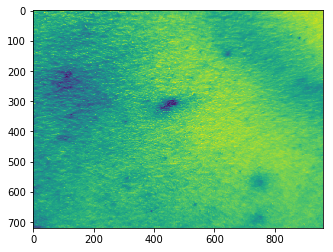

In [113]:
img2=cv.imread('mole.jpg',cv.IMREAD_GRAYSCALE)
plt.imshow(img2)

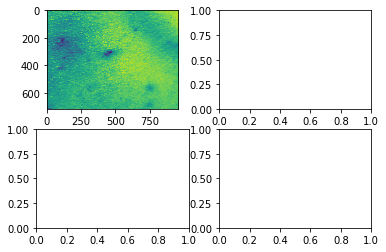

In [114]:
fig,(ax1,ax2)=plt.subplots(2,2)
ax1[0].imshow(img2)

In [115]:

image2=pre_process(img2)


In [116]:
image2.shape

(1, 150, 150, 1)

In [118]:
model_2.predict(image2)

array([[0.64714396]], dtype=float32)

# Trying Individual Image with ImageDataGenerator class

In [4]:
test_gen_ind = ImageDataGenerator(rescale = 1./255)


NameError: name 'ImageDataGenerator' is not defined

In [315]:
df_test.head()

,image_id,dx
1964,ISIC_0026352.jpg,1_cancer
358,ISIC_0029522.jpg,0_not_cancer
1773,ISIC_0032462.jpg,1_cancer
9784,ISIC_0030341.jpg,1_cancer
1253,ISIC_0031953.jpg,1_cancer


In [316]:
ind_test=df_test.iloc[0:2,:]

In [317]:
ind_test

,image_id,dx
1964,ISIC_0026352.jpg,1_cancer
358,ISIC_0029522.jpg,0_not_cancer


In [318]:
test_gen_ind = test_gen_ind.flow_from_dataframe(dataframe=ind_test, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= 3)


Found 2 images belonging to 2 classes.


In [319]:
len(test_gen_ind)

1

In [320]:
model.evaluate_generator(generator=test_gen_ind,steps=1)

[1.3705891370773315, 0.5, 0.9999998807907104, 0.666666567325592]

In [329]:
model.predict_generator(generator=test_gen_ind, verbose=1, steps = 1)

1/1 [==============================] - 0s 31ms/step


array([[0.9075566],
       [0.6976628]], dtype=float32)

### ISIC_0026352.jpg	(cancer)

<img src=".\All_Images\ISIC_0026352.jpg">

### ISIC_0029522.jpg (Not cancer)

<img src=".\All_Images\ISIC_0029522.jpg">

# Saving Augmented Images

In [59]:
balanced_df=df_new.drop(df_new[df_new['dx']=='0_not_cancer'].sample(frac=.8145).index)
df_individual=balanced_df.iloc[2109:2111,:]


In [60]:
balanced_df.groupby('dx').count()

,image_id
dx,
0_not_cancer,1169
1_cancer,1169


In [61]:
test_gen_ind = ImageDataGenerator()

test_gen_ind = test_gen_ind.flow_from_dataframe(dataframe=df_individual, directory ='.\All_Images', save_to_dir= '.\Augmented_images', save_format='jpeg', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= 3)



Found 2 images belonging to 2 classes.


In [248]:
i=0
for batch in test_gen_ind :
    print("hi")
    i=i+1
    if i==4:
        break
    



hi
hi
hi
hi


# Iterations 2

In [24]:
batch_size = 15
image_dimensions = (150,150)

train_gen2 = ImageDataGenerator(rescale = 1./255, rotation_range = 45, horizontal_flip = True, vertical_flip = True, width_shift_range=[-20,20], height_shift_range=[-20,20])
test_gen2 = ImageDataGenerator(rescale = 1./255)

# train_gen = im_gen.flow_from_directory(directory = '..\Images\All_images_in_classes', target_size=(50,50), color_mode='rgb', class_mode = 'categorical', batch_size =100, subset ='training')
# test_gen = im_gen.flow_from_directory(directory = '..\Images\All_images_in_classes', target_size=(50,50), color_mode='rgb', class_mode = 'categorical', batch_size =100, subset = 'validation')

train_gen2=train_gen2.flow_from_dataframe(dataframe=df_train, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= batch_size)
test_gen2 = test_gen2.flow_from_dataframe(dataframe=df_test, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= batch_size, shuffle=False)


Found 1870 images belonging to 2 classes.
Found 468 images belonging to 2 classes.


In [25]:
df_test.head(10)

,image_id,dx
1964,ISIC_0026352.jpg,1_cancer
395,ISIC_0027287.jpg,0_not_cancer
1773,ISIC_0032462.jpg,1_cancer
9784,ISIC_0030341.jpg,1_cancer
1253,ISIC_0031953.jpg,1_cancer
3647,ISIC_0028299.jpg,0_not_cancer
1452,ISIC_0033496.jpg,1_cancer
7987,ISIC_0033448.jpg,0_not_cancer
2562,ISIC_0030659.jpg,1_cancer
9988,ISIC_0027588.jpg,1_cancer


In [26]:
df_test.sort_values(by=['image_id'])


,image_id,dx
700,ISIC_0024312.jpg,0_not_cancer
4957,ISIC_0024320.jpg,0_not_cancer
2554,ISIC_0024360.jpg,1_cancer
4809,ISIC_0024398.jpg,0_not_cancer
4850,ISIC_0024399.jpg,0_not_cancer
9827,ISIC_0024418.jpg,1_cancer
1958,ISIC_0024449.jpg,1_cancer
9793,ISIC_0024450.jpg,1_cancer
2781,ISIC_0024452.jpg,1_cancer
2558,ISIC_0024504.jpg,1_cancer


In [30]:
import matplotlib.pyplot as plt

gen_order = []
for i in range(32):
    images,labels=test_gen2.next()
    gen_order.extend(labels)

print(len(gen_order))
# k=0
# fig, (ax1) = plt.subplots(1,5,figsize=(100,100))
# for im in images:
#     im=im.reshape(150,150)
# #     print(im.shape)
#     ax1[k].imshow(im)
#     ax1[k].set_title(labels[k],fontdict={'fontsize':50})

#     k=k+1
#     if k==5:
#         break

# for im in images:
#     print(im.shape)
#     hi=im
    

# g=hi.reshape(150,150)
# ax1[0].imshow(g)
    
    

468


In [144]:
gen_order

[1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0

In [143]:
#test_gen2.classes == gen_order
df_test_yn = df_test['dx'].apply(lambda x: 1 if '1' in x else 0).values
df_test_yn
gen_order == df_test_yn

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [51]:
del model_2

Conclusion: generator starts in order if shuffle is off starting with the images at the top of the dataframe, labels values when calling images, labels = gen.next()

In [27]:
input_into_first_layer = (150,150,1)

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3),input_shape=input_into_first_layer))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (3, 3),activation = 'relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2) ))

model_2.add(Conv2D(64, (3, 3), activation ='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model_2.add(Dense(64, activation ='relu'))
# model.add(Dropout(0.5))
model_2.add(Dense(1, activation ='sigmoid'))
# model.add(Activation('softmax'))

model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy',recall, f1])

model_2.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_

In [28]:
model_2.fit_generator(
        train_gen2,
        steps_per_epoch=ceil(1870/batch_size),
        epochs=35,
        class_weight = {0:1,
                        1:3}
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/35
125/125 [==============================] - 29s 229ms/step - loss: 1.1363 - binary_accuracy: 0.5000 - recall: 1.0000 - f1: 0.6562
Epoch 2/35
125/125 [==============================] - 28s 220ms/step - loss: 1.0898 - binary_accuracy: 0.5003 - recall: 1.0000 - f1: 0.6581
Epoch 3/35
125/125 [==============================] - 27s 215ms/step - loss: 1.0852 - binary_accuracy: 0.5008 - recall: 1.0000 - f1: 0.6545
Epoch 4/35
125/125 [==============================] - 26s 212ms/step - loss: 1.0797 - binary_accuracy: 0.5008 - recall: 0.9981 - f1: 0.6572
Epoch 5/35
125/125 [==============================] - 28s 224ms/step - loss: 1.0636 - binary_accuracy: 0.5045 - recall: 0.9971 - f1: 0.6580
Epoch 6/35
125/125 [==============================] - 27s 214ms/step - loss: 1.0822 - binary_accuracy: 0.5032 - recall: 0.9900 - f1: 0.6549
Epoch 7/35
125/125 [==============================] - 28s 222ms/step - loss: 1.0337 - binary_accuracy: 0.5064 - 

In [29]:
model_2.evaluate_generator(test_gen2, steps = len(test_gen2), verbose=1)


32/32 [==============================] - 6s 182ms/step


[0.5455130047332017,
 0.7735042870044708,
 0.8983608988615183,
 0.7841587930153577]

array([[1.]], dtype=float32)

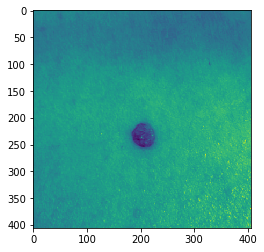

In [83]:
import matplotlib.pyplot as plt
import cv2 as cv

img= cv.imread('.\mole2.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img_gray)
img_gray=cv.resize(img_gray,(150,150))
img=img_gray.reshape(1,150,150,1)

model_2.predict(img)

# plt.imshow(img)
# img.reshape(406,406)
# typ
# plt.imshow(img)

In [ ]:
model_2.predict()

In [31]:
test_gen2 = ImageDataGenerator(rescale = 1./255)
test_gen2 = test_gen2.flow_from_dataframe(dataframe=df_test, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= batch_size, shuffle=False)

Found 468 images belonging to 2 classes.


In [32]:
y_pred_2=model_2.predict_generator(test_gen2,steps = len(test_gen2))

In [33]:
y_true_2=test_gen2.classes

In [34]:
k=0
for i in y_pred_2:
    if y_pred_2[k]>=.5:
        y_pred_2[k]=1
    else:
        y_pred_2[k]=0
    k=k+1
    

In [35]:
def miguel_matrix(y_true_2,y_pred_2):
    tp=0
    tn=0
    fp=0
    fn=0
    k=0
    for i in range(len(y_pred_2)):
        if y_pred_2[k]==0 and y_true_2[k]==0:
            tn=tn+1
        if y_pred_2[k]==1 and y_true_2[k]==1:
            tp=tp+1
        if y_pred_2[k]==0 and y_true_2[k]==1:
            fn=fn+1
        if y_pred_2[k]==1 and y_true_2[k]==0:
            fp=fp+1
        k=k+1
        
    return np.array([[tn ,fp],[fn, tp]])

miguel_matrix=miguel_matrix(y_true_2,y_pred_2)
miguel_matrix

array([[151,  83],
       [ 23, 211]])

In [36]:
tn=miguel_matrix[0][0]
fp=miguel_matrix[0][1]
fn=miguel_matrix[1][0]
tp=miguel_matrix[1][1]

recall=tp/(tp+fn)
precision=tp/(tp+fp)
print(recall)
print(precision)

0.9017094017094017
0.717687074829932


In [37]:
accuracy= (tp+tn)/(tp+fn+fp+tn)
accuracy

0.7735042735042735

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true_2,y_pred_2)

array([[ 41, 193],
       [ 39, 195]], dtype=int64)

# Trying Individual Images 

In [346]:
test_gen_ind = ImageDataGenerator(rescale = 1./255)

In [347]:
df_test.head()

,image_id,dx
1964,ISIC_0026352.jpg,1_cancer
358,ISIC_0029522.jpg,0_not_cancer
1773,ISIC_0032462.jpg,1_cancer
9784,ISIC_0030341.jpg,1_cancer
1253,ISIC_0031953.jpg,1_cancer


In [348]:
ind_test=df_test.iloc[0:2,:]

In [349]:
ind_test

,image_id,dx
1964,ISIC_0026352.jpg,1_cancer
358,ISIC_0029522.jpg,0_not_cancer


In [350]:
test_gen_ind = test_gen_ind.flow_from_dataframe(dataframe=ind_test, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= 3)


Found 2 images belonging to 2 classes.


In [353]:
model_2.predict_generator(generator=test_gen_ind, verbose=1, steps = 1)

1/1 [==============================] - 0s 28ms/step


array([[0.9734937 ],
       [0.77222997]], dtype=float32)

# Iteration 3, not undersampling

In [169]:
from sklearn.metrics import confusion_matrix



df = pd.read_csv('.\HAM10000_metadata.csv')
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [170]:
df_new=df.drop_duplicates('lesion_id')

In [171]:
df_new['image_id']=df_new['image_id'].apply(lambda x: x+'.jpg' )

C:\Users\petra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
df_new.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419.jpg,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769.jpg,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633.jpg,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176.jpg,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837.jpg,bkl,histo,70.0,female,back


In [173]:
df_new=df_new.loc[:,['image_id','dx']]


In [174]:
def binary_coder(sample):
    if (sample =='mel') or (sample=='bcc') or (sample=="akiec"):
        sample='1_cancer'
    else:
        sample='0_not_cancer'
        
    return sample
    

# def binary_coder(sample):
#     if (sample =='mel') or (sample=='bcc') or (sample=="akiec"):
#         sample='cancer'
#         return sample

#     else:
#         sample='not cancer'
#         return sample
    
df_new['dx'] = df_new['dx'].apply(binary_coder) 




In [175]:
df_new.groupby('dx').count()

,image_id
dx,
0_not_cancer,6301
1_cancer,1169


In [176]:
df_train_3, df_test_3 =train_test_split(df_new, train_size=.8, random_state =2, stratify=df_new['dx'])


C:\Users\petra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [177]:
batch_size = 32
image_dimensions = (150,150)

train_gen3 = ImageDataGenerator(rescale = 1./255, rotation_range = 45, horizontal_flip = True, vertical_flip = True, width_shift_range=[-20,20], height_shift_range=[-20,20])
test_gen3 = ImageDataGenerator(rescale = 1./255)

# train_gen = im_gen.flow_from_directory(directory = '..\Images\All_images_in_classes', target_size=(50,50), color_mode='rgb', class_mode = 'categorical', batch_size =100, subset ='training')
# test_gen = im_gen.flow_from_directory(directory = '..\Images\All_images_in_classes', target_size=(50,50), color_mode='rgb', class_mode = 'categorical', batch_size =100, subset = 'validation')

train_gen3=train_gen3.flow_from_dataframe(dataframe=df_train_3, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= batch_size)
test_gen3 = test_gen3.flow_from_dataframe(dataframe=df_test_3, directory ='.\All_Images', x_col='image_id', y_col='dx',target_size=image_dimensions, color_mode='grayscale', class_mode='binary', batch_size= batch_size,Shuffle=False)


Found 5976 images belonging to 2 classes.
Found 1494 images belonging to 2 classes.


In [185]:

input_into_first_layer = (150,150,1)

model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3),input_shape=input_into_first_layer))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(32, (3, 3),activation = 'relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2) ))

model_3.add(Conv2D(64, (3, 3), activation ='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model_3.add(Dense(64, activation ='relu'))
# model.add(Dropout(0.5))
model_3.add(Dense(1, activation ='sigmoid'))
# model.add(Activation('softmax'))

model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy',recall,precision, f1])

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 17, 17, 64)        0         
__________

In [186]:
model_3.fit_generator(
        train_gen3,
        steps_per_epoch=ceil(1870/batch_size),
        epochs=10,
        class_weight = {0:1,
                        1:8}
)

Epoch 1/10
59/59 [==============================] - 38s 638ms/step - loss: 1.4243 - binary_accuracy: 0.1859 - recall: 0.9593 - precision: 0.1509 - f1: 0.2553
Epoch 2/10
59/59 [==============================] - 37s 630ms/step - loss: 1.3856 - binary_accuracy: 0.1504 - recall: 1.0000 - precision: 0.1504 - f1: 0.2554
Epoch 3/10
59/59 [==============================] - 38s 641ms/step - loss: 1.4128 - binary_accuracy: 0.1610 - recall: 1.0000 - precision: 0.1610 - f1: 0.2704
Epoch 4/10
59/59 [==============================] - 32s 535ms/step - loss: 1.3834 - binary_accuracy: 0.2161 - recall: 0.9489 - precision: 0.1638 - f1: 0.2720
Epoch 5/10
59/59 [==============================] - 33s 567ms/step - loss: 1.4119 - binary_accuracy: 0.3607 - recall: 0.8958 - precision: 0.2106 - f1: 0.3269
Epoch 6/10
59/59 [==============================] - 32s 547ms/step - loss: 1.3339 - binary_accuracy: 0.4942 - recall: 0.7730 - precision: 0.2166 - f1: 0.3220
Epoch 7/10
59/59 [==============================] - 

In [255]:
model_3.evaluate_generator(test_gen3, steps = len(test_gen3))


[0.9140039164538045,
 0.27710843389452383,
 0.967488998709274,
 0.17613074905581902,
 0.29275800987898587]

In [218]:
y_pred=model_3.predict_generator(test_gen3, steps=len(test_gen3))

In [219]:
y_pred

array([[0.92866725],
       [0.6599717 ],
       [0.6191731 ],
       ...,
       [0.34929526],
       [0.6133474 ],
       [0.6321764 ]], dtype=float32)

In [220]:
# y_pred=model_3.predict_generator(test_gen3, steps = len(test_gen3))
y_true=test_gen3.classes



In [222]:
y_true

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [223]:
k=0
for i in y_pred:
    if y_pred[k]>=.5:
        y_pred[k]=1
    else:
        y_pred[k]=0
    k=k+1
    


In [224]:
def miguel_matrix(y_true,y_pred):
    tp=0
    tn=0
    fp=0
    fn=0
    k=0
    for i in range(len(y_pred)):
        if y_pred[k]==0 and y_true[k]==0:
            tn=tn+1
        if y_pred[k]==1 and y_true[k]==1:
            tp=tp+1
        if y_pred[k]==0 and y_true[k]==1:
            fn=fn+1
        if y_pred[k]==1 and y_true[k]==0:
            fp=fp+1
        k=k+1
        
    return np.array([[tn ,fp],[fn, tp]])

miguel_matrix=miguel_matrix(y_true,y_pred)
miguel_matrix

array([[ 182, 1078],
       [  19,  215]])

In [225]:
tn=miguel_matrix[0][0]
fp=miguel_matrix[0][1]
fn=miguel_matrix[1][0]
tp=miguel_matrix[1][1]

recall=tp/(tp+fn)
precision=tp/(tp+fp)
print(recall)
print(precision)

0.9188034188034188
0.1662799690641918


In [226]:
accuracy= (tp+tn)/(tp+fn+fp+tn)
accuracy

0.2657295850066934

In [144]:
confusion_matrix(y_true,y_pred)

array([[684, 576],
       [142,  92]], dtype=int64)

In [123]:
y_true model 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [67]:
len(y_labels)

32

In [68]:
y_labels

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

In [70]:
model_3.predict(x)

array([[0.9704884 ],
       [0.82282215],
       [0.9228008 ],
       [0.6806685 ],
       [0.30790663],
       [0.07192844],
       [0.6023172 ],
       [0.19309878],
       [0.05492455],
       [0.07044649],
       [0.94325674],
       [0.21082854],
       [0.08447543],
       [0.278752  ],
       [0.42559505],
       [0.7217413 ],
       [0.7121027 ],
       [0.07040808],
       [0.6928571 ],
       [0.2812217 ],
       [0.10593092],
       [0.6347262 ],
       [0.8864411 ],
       [0.49812114],
       [0.860495  ],
       [0.11140522],
       [0.2469284 ],
       [0.7832467 ],
       [0.24330905],
       [0.8547966 ],
       [0.6869298 ],
       [0.16582808]], dtype=float32)

In [53]:
len(y_pred)

1494

In [50]:
sum(y_pred>.5)

array([675])